# Project 2 Part 5

Support and References:

Students are encouraged to consult the official documentation of NLTK, SpaCy, wordcloud, and Scikit-Learn, as well as the Learn Platform.

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.probability import FreqDist
from wordcloud import WordCloud

## 1) Data Preprocessing

### Load and inspect the dataset.

How many reviews?
What does the distribution of ratings look like?
Any null values?

Use the rating column to create a new target column with two groups: high-rating and low-rating groups.

We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.
Utilize NLTK and SpaCy for basic text processing, including:

removing stopwords

tokenization

lemmatization

Tips:

Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
You will want to create several versions of the data, lemmatized, tokenized, lemmatized joined back to one string per review, and tokenized joined back to one string per review. This will be useful for different analysis and modeling techniques.

​Note: you may find some artifacts during your EDA e.g. HTML code like "href". You are allowed to drop rows from your dataset after identifying problematic trends in some of the texts.  (Hint: remember df[col].str.contains)
Save your processed data frame in a joblib file saved in the "Data-NLP/" folder for future modeling.

In [2]:
# load dataset
df = pd.read_csv('Data-NLP/movie_reviews_v2.csv')

# preview dataset
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0


In [3]:
# how many reviews?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB


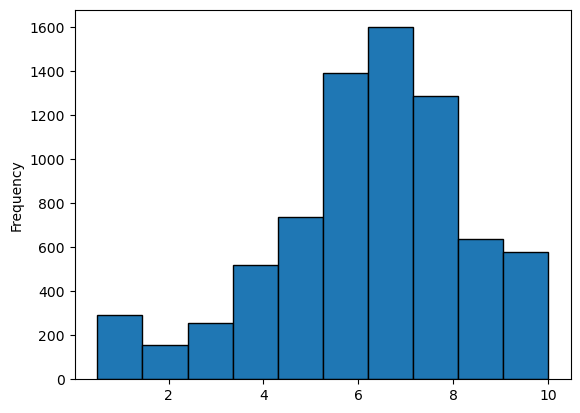

In [4]:
# what does the distribution of ratings look like?
df['rating'].plot(kind='hist', edgecolor='black');

In [5]:
# any null values?
df.isna().sum()

review_id            0
movie_id             0
imdb_id              0
original_title       0
review               0
rating            1196
dtype: int64

In [6]:
# Use the rating column to create a new target column with two groups: high-rating (>=9) and low-rating groups (<=4)

hl_rating = []

for rating in df['rating']:
    if rating >= 9.0:
        hl_rating.append('high')
    elif rating <= 4.0:
        hl_rating.append('low')
    else:
        hl_rating.append('med')
        
df['high_low'] = hl_rating

In [7]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med


## 2) EDA and Visualization

### Create word clouds to visualize the most frequent and significant words in each group.

Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)

Save your wordclouds as .png files in the "Images/" folder in your repo.

In [8]:
# convert all words to lower
df['review_lowercase'] = df['review'].str.lower()

#### Create Tokens

In [18]:
# create tokens
df['tokens'] = df['review_lowercase'].str.split()

In [19]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as..."
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ..."
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'..."
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid..."


#### Create Lemmas

In [21]:
# load spacy model with parser and ner disabled
nlp_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# verify parser and ner not loaded
nlp_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [22]:
# [V1 List Comp] Define a function to use spacy to process our text
def spacy_process(text):
        """Lemmatize tokens, lower case, remove punctuation, spaces, and stop words"""
        doc = nlp_model(text)
        processed_doc = [token.lemma_.lower() for token in doc if not token.is_punct and 
                         not token.is_space and not token.is_stop and 
                         not 'http' in token.lemma_.lower() and 'www' not in token.lemma_.lower()]
        return processed_doc

In [23]:
## process the text using the spacy function
df['spacy_lemmas'] = df['review'].apply(spacy_process)

In [25]:
# Join list of lemmas into a string with spaces between each lemma
df['lemmas_joined'] = df['spacy_lemmas'].map(lambda x: " ".join(x))

In [26]:
# verify changes
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,high_low,review_lowercase,tokens,spacy_lemmas,lemmas_joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,med,this is a fine piece of cinema from wong kar-w...,"[this, is, a, fine, piece, of, cinema, from, w...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tell story peop...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,med,made my roommate who hates stop-motion animati...,"[made, my, roommate, who, hates, stop-motion, ...","[roommate, hate, stop, motion, animation, watc...",roommate hate stop motion animation watch 2018...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,med,a very good stop-motion animation!\r\n\r\n<em>...,"[a, very, good, stop-motion, animation!, <em>'...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,med,"ok, there is an huge temptation to riddle this...","[ok,, there, is, an, huge, temptation, to, rid...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review pun go crack ...


In [12]:
# create respective filters for high and low ratings
filter_high = df['high_low'] =='high'
filter_low = df['high_low'] == 'low'

In [27]:
# Make a single giant string with entire group of >=9.0 ratings
high_lemmas_joined= " ".join(df.loc[filter_high, 'lemmas_joined'])
# Make a single giant string with entire group of <=4.0 ratings
low_lemmas_joined= " ".join(df.loc[filter_low, 'lemmas_joined'])

In [28]:
# create 2 wordclouds: high and low

high_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(high_lemmas_joined)
low_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(low_lemmas_joined)

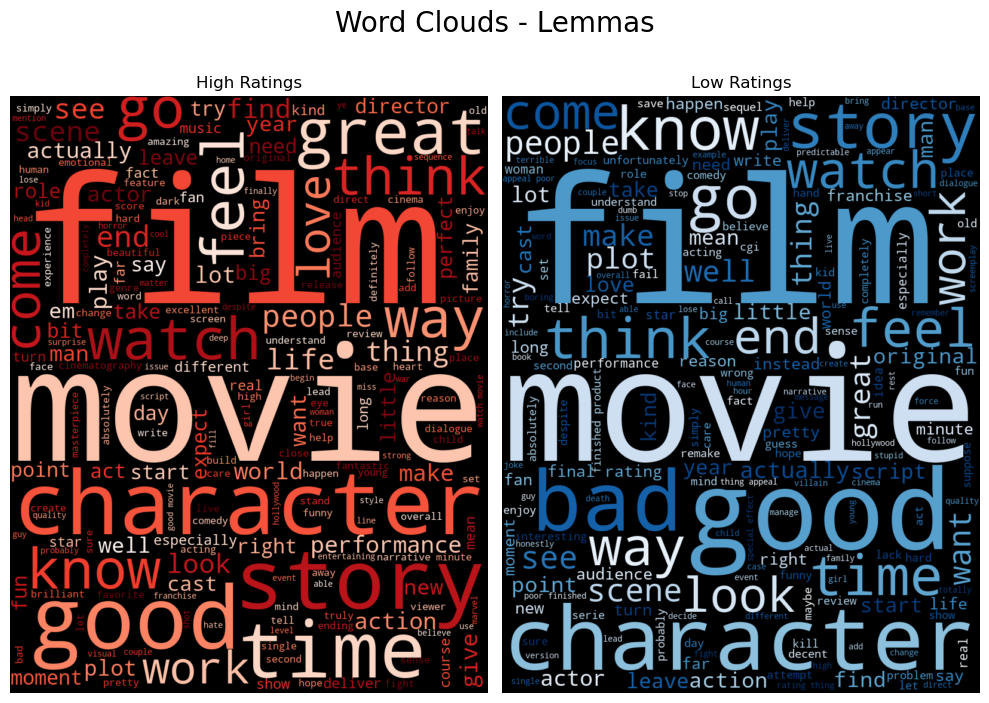

In [31]:
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(high_cloud, interpolation='bilinear')
axes[0].set_title("High Ratings")
axes[1].imshow(low_cloud, interpolation='bilinear')
axes[1].set_title("Low Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

### Apply nltk's FreqDist class to compare the frequency distribution of words in the review groups.

Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)

Save your freq dist plots as .png files in the "Images/" folder in your repo.



### Perform n-grams analysis (bigrams and trigrams)

Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)

Focus on bigrams or trigrams, using NLTK's BigramCollocationFinder and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.

Describe any differences. What do these differences tell you?

Save your data frame comparison of the top ngrams for each group as a Markdown table.
    
    You can use the df.to_markdown() method to create a string version of your data frame that can be copied and pasted into a Markdown cell and your README.

### Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

Compare the sentiments of high-rating and low-rating texts.

Compare the compound sentiment scores for high and low-rating reviews.

Which review polarity scores don't match the ratings? Why do you think this is?

## 3) Evaluation and Reporting:

### Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?

List 3 things associated with high-rating reviews.

List 3 things associated with low-rating reviews.

### Update your project README with a new section for "NLP Analysis of Movie Reviews."

Include what reviews were used (source and what the original rating numbers were before they were converted to a categorical target).

Include your EDA visualizations in your README:

    One wordcloud comparing both groups
    Two FreqDists plots (1 per group)
    A Markdown table of the Top Ngrams for each group.

Include your recommendations/conclusions for what to do/not to do make a highly-rated movie.

### Deliverables:

Notebook files for preprocessing and EDA

EDA Images saved in an "Images" folder.

Updated README